In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Downloads/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['Species']=df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
X=df.drop('Species',axis=1).values
y=df['Species'].values

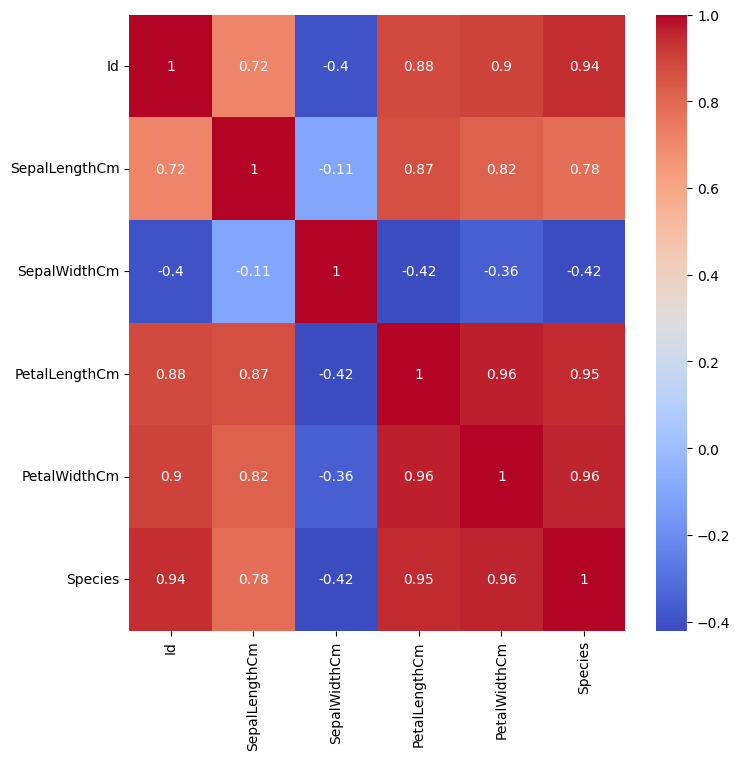

In [4]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

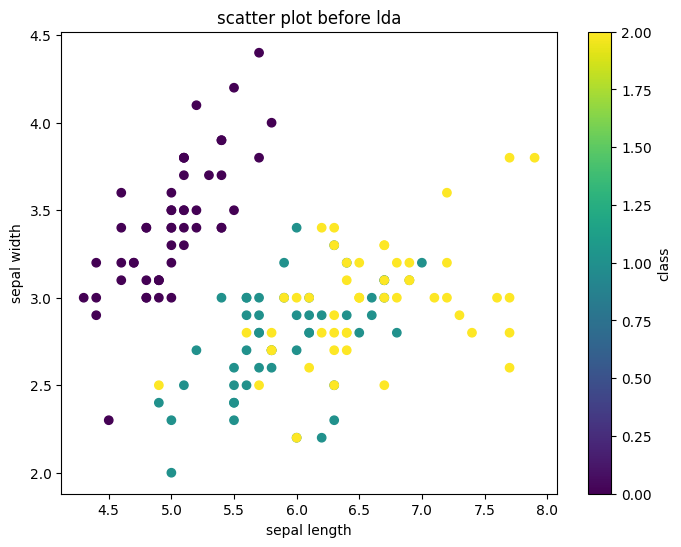

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,1], X[:,2], c=y,cmap='viridis',marker='o')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('scatter plot before lda')
plt.colorbar(label='class')
plt.show()

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
X_lda=lda.fit_transform(X,y)
print("explained variance raio:",lda.explained_variance_ratio_)

explained variance raio: [0.98709288 0.01290712]


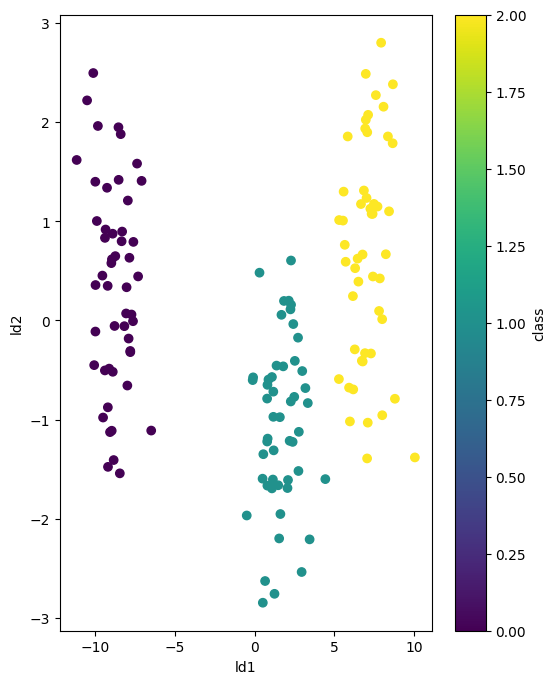

In [12]:
plt.figure(figsize=(6,8))
plt.scatter(X_lda[:,0],X_lda[:,1],c=y)
plt.xlabel('ld1')
plt.ylabel('ld2')
plt.colorbar(label='class')
plt.show()

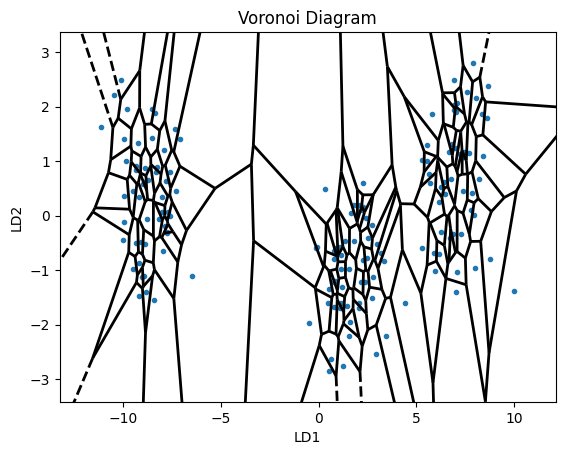

In [13]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor=Voronoi(X_lda)
fig=voronoi_plot_2d(vor, show_vertices=False, line_colors='k',line_width=2)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Voronoi Diagram')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
lda.fit(X_train,y_train)
y_pred=lda.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



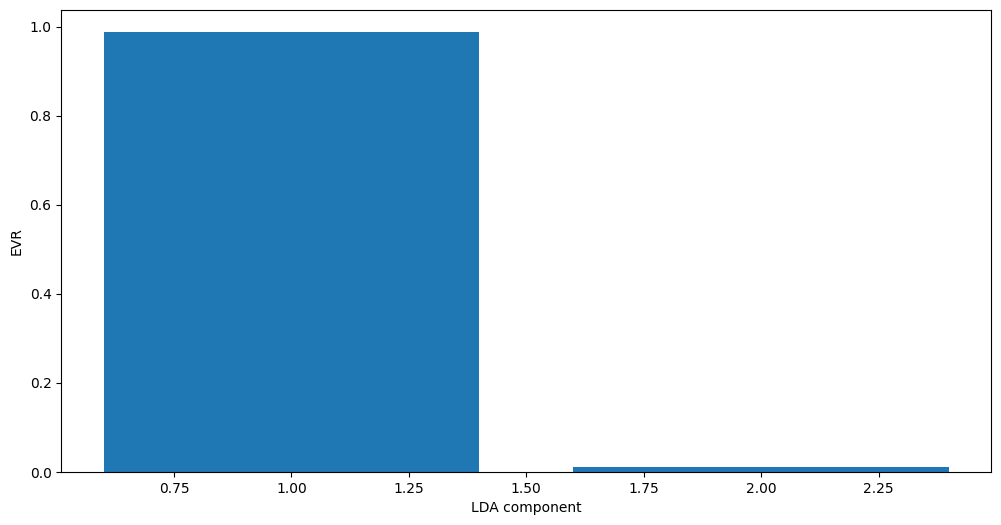

In [18]:
plt.figure(figsize=(12,6))
plt.bar(range(1,len(lda.explained_variance_ratio_)+1), lda.explained_variance_ratio_)
plt.xlabel('LDA component')
plt.ylabel('EVR')
plt.show()

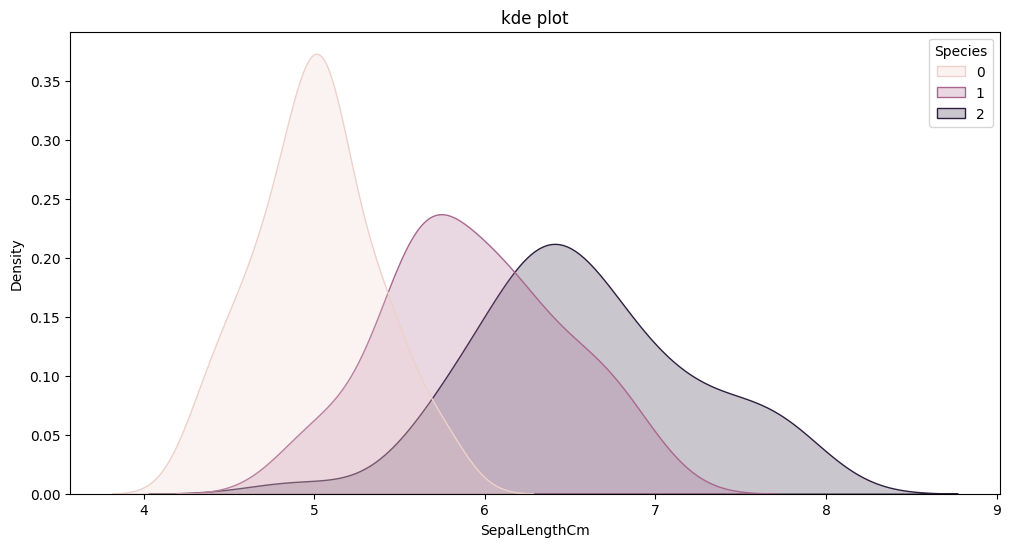

In [20]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.kdeplot(data=df,x="SepalLengthCm", hue='Species',fill=True)
plt.title("kde plot")
plt.show()